In [2]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import pickle as pkl
import seaborn as sns
from scipy.misc import imsave
import os

In [3]:
osjoin = os.path.join

In [6]:
result_dir = 'output_joint_p1_test1'

In [7]:
f = open(os.path.join(result_dir, 'stats.pkl'),'rb')

In [8]:
stat_dir = os.path.join(result_dir, 'stats_figs')

In [9]:
if not os.path.exists(stat_dir):
    os.makedirs(stat_dir)

In [10]:
stats = pkl.load(f)

In [11]:
stats.keys()

dict_keys(['p1', 'g_p1', 'diffs'])

/data/work2/Phys-GAN/physgan/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


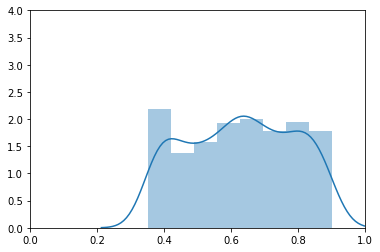

In [12]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 4.0])
sns.distplot(stats['p1'])
plt.savefig(osjoin(stat_dir, 'p1_histogram.png'))

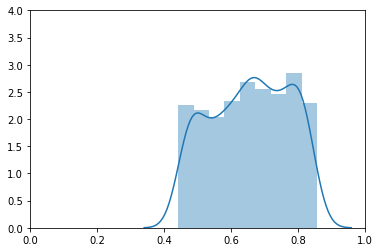

In [13]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 4.0])
sns.distplot(stats['g_p1'])
plt.savefig(osjoin(stat_dir, 'g_p1_histogram.png'))

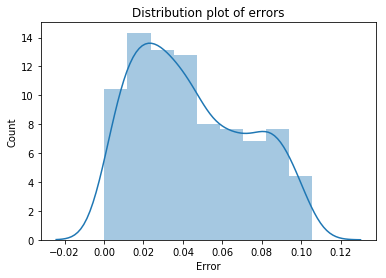

In [14]:
plt.figure()
plt.title('Distribution plot of errors')
sns.distplot(np.abs(stats['diffs']))
plt.xlabel('Error')
plt.ylabel('Count')
plt.savefig(osjoin(stat_dir, 'error_histogram.png'))

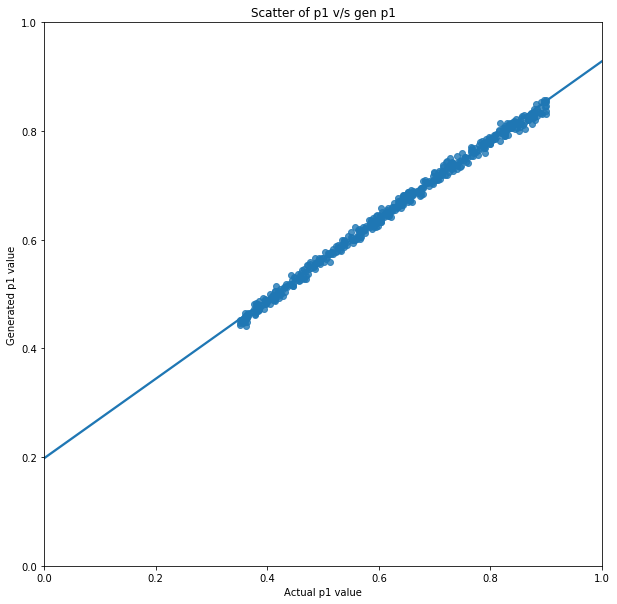

In [15]:
plt.figure(figsize=(10, 10))
plt.title('Scatter of p1 v/s gen p1')
plt.xlabel('Actual p1 value')
plt.ylabel('Generated p1 value')
plt.xlim([0,1.0])
plt.ylim([0,1.0])
sns.regplot(x=stats['p1'], y=stats['g_p1'], )
plt.savefig(osjoin(stat_dir, 'reglineplot.png'))

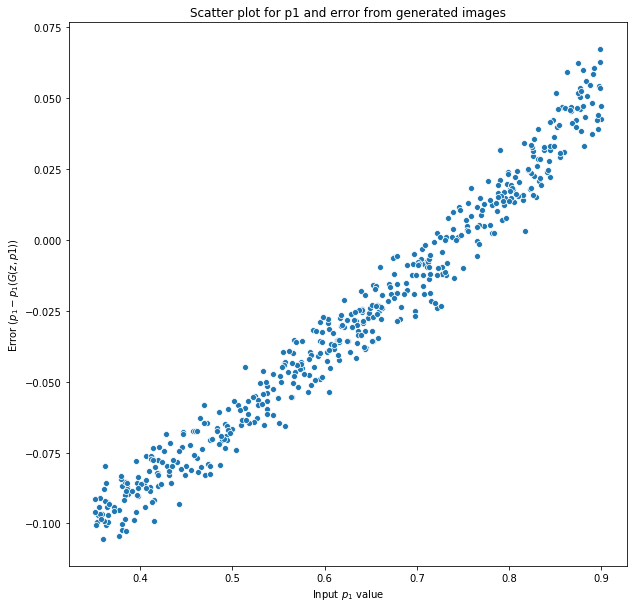

In [16]:
plt.figure(figsize=(10,10))
plt.title('Scatter plot for p1 and error from generated images')
plt.xlabel('Input $p_1$ value')
plt.ylabel('Error ($p_1 - p_1(G(z, p1)$)')
sns.scatterplot(x=stats['p1'], y=stats['diffs'])
plt.savefig(osjoin(stat_dir, 'error_plot.png'))

In [17]:
sp.stats.describe(np.abs(stats['diffs']))

DescribeResult(nobs=500, minmax=(0.00015330315, 0.10560182), mean=0.04412196, variance=0.0007976799, skewness=0.3822201192378998, kurtosis=-0.9978071603070626)

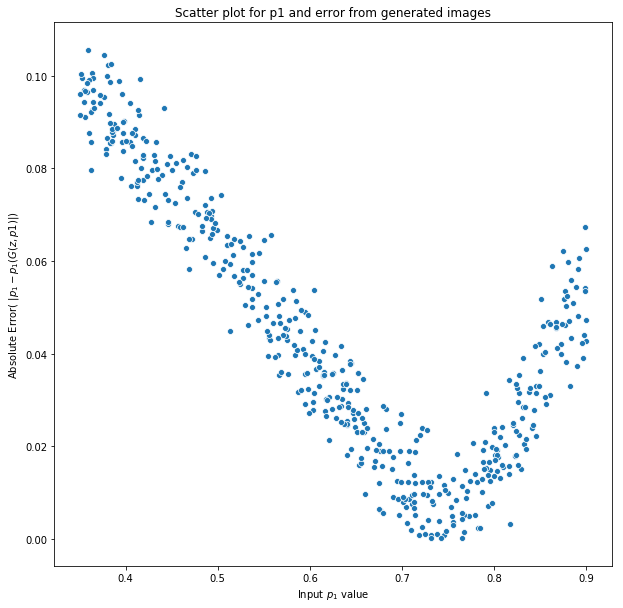

In [18]:
plt.figure(figsize=(10,10))
plt.title('Scatter plot for p1 and error from generated images')
plt.xlabel('Input $p_1$ value')
plt.ylabel('Absolute Error( $|p_1 - p_1(G(z, p1)|$)')
sns.scatterplot(x=stats['p1'], y=np.abs(stats['diffs']))
plt.savefig(osjoin(stat_dir, 'abs_error_plot.png'))